In [23]:
import dask.array as da
# visualize cellpose segmentations

cellpose_zarr = 'out/results/sub-o21/micr/sub-o21_sample-brain_acq-prestitched_stain-{stain}_desc-cellpose_dseg.zarr'
spim_zarr = '/cifs/prado/Kate/AK_Pipeline_LSM/spimprep/bids/sub-o21/micr/sub-o21_sample-brain_acq-prestitched_SPIM.ome.zarr'

In [25]:
da_cellpose = da.from_zarr(cellpose_zarr.format(stain='BetaAmyloid'))

In [26]:
da_img = da.from_zarr(spim_zarr,component='/2')

In [27]:
da_cellpose

dask.array<from-zarr, shape=(2159, 2931, 1862), dtype=int32, chunksize=(200, 200, 200), chunktype=numpy.ndarray>

In [28]:
da_img

dask.array<from-zarr, shape=(2, 2159, 2931, 1862), dtype=uint16, chunksize=(1, 1, 2931, 1862), chunktype=numpy.ndarray>

In [29]:
import matplotlib.pyplot as plt

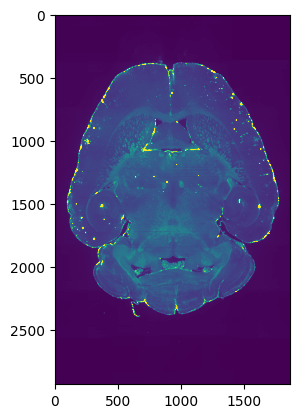

In [31]:
plt.imshow(da_img[1,1000,:,:],vmax=500)

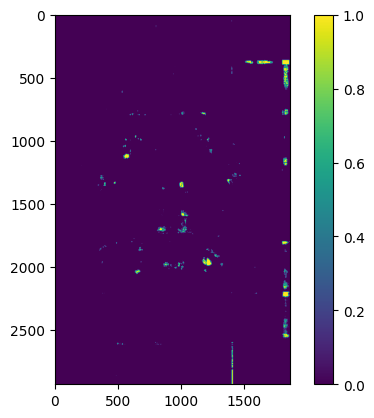

In [32]:
plt.imshow(da_cellpose[1000,:,:])
plt.colorbar()

In [35]:
import nibabel as nib
import numpy as np

nib.Nifti1Image(da_img[1,1000,:,:].compute(),affine=np.eye(4)).to_filename('test_slice_BetaAmyloid.nii')
nib.Nifti1Image(da_cellpose[1000,:,:].compute(),affine=np.eye(4)).to_filename('test_slice_BetaAmyloid_cellpose.nii')

